In [ ]:
#Abgabe 3

In [106]:
# Setup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Data
1. Import der Daten

Dieser Schritt ist bei den Daten in diesem Projekt sehr simpel, die Daten sind in einer .csv Datei im ordner Daten vorhanden und können mit der Hilfe von Pandas read_csv in einen Dataframe geladen werden.

In [8]:
df = pd.read_csv("../Daten/NBA_Stats_202324.csv", sep = ",")
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,...,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8
1,NaN,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,...,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,...,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,...,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7
4,NaN,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,...,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6


2. Data structure

a). df.info()
In diesem Bereich werden die generellen Datenstrukturen der Importierten Datei aufgeführt und analysiert. 
Ein großer Teil der Datenfelder, des Datensatzes sind nummerische Werte, nur drei Datenfelder besitzen nicht nummerische Werte. Dies sind die Datenfelder NAME, TEAM und POS in diesen Datenfelder stehen String Werte die Informationen zu Spezifischen Spielern liefer z.B. den Namen des Spielers, das Team des Spielers und die Position des Spielers. Bei den nummerischen Werten gibt es float und integer Werte, wobei die Integer Werte eine deutlich geringere Anzahl besitzen mit 4 Datenfeldern. Die Datenfelder mit Integern sind GP (Games Played), FTA (Free Throw Attempts), 2PA (2 Point Attempts) und 3PA (3 Point Attempts). Die restlichen Datenfelder beinhalten float (Dezimalzahlen) Werte.

b). df.describe()
Alle Datenfelder beinhalten 0 Werte, diese sollten bei der Vorbereitung der Daten, zur verwendung in der Analyse und in Modellen betrachtet werden. Zusätzlich hat das Datenfeld RANK nur NAN Values. Das bedeutet, das dass Datenfeld entfernt werden muss und eine neue ID für die unterschiedlichen Datensätze eingeführt werden sollte, anhand der man den Datensatz identifizieren kann. Es gibt auch noch auffällige Maximalwerte bei der Analyse der nummerischen Datenfelder für die Felder:

1. FTA
    a. Maximalwert = 782
    b. Mean = 81.321157
    c. std. = 112.790568
3. 2PA
    a. Maximalwert = 1246
    b. Mean = 201.438356
    c. std. = 246.585122
5. 3PA
    a. Maximalwert = 876
    b. Mean = 131.435312
    c. std. = 156.920797
7. P+R+A
    a. Maximalwert = 52.9
    b. Mean = 13.378539
    c. std. = 9.931195

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    657 non-null    object 
 2   TEAM    657 non-null    object 
 3   POS     657 non-null    object 
 4   AGE     657 non-null    float64
 5   GP      657 non-null    int64  
 6   MPG     657 non-null    float64
 7   USG%    657 non-null    float64
 8   TO%     657 non-null    float64
 9   FTA     657 non-null    int64  
 10  FT%     657 non-null    float64
 11  2PA     657 non-null    int64  
 12  2P%     657 non-null    float64
 13  3PA     657 non-null    int64  
 14  3P%     657 non-null    float64
 15  eFG%    657 non-null    float64
 16  TS%     657 non-null    float64
 17  PPG     657 non-null    float64
 18  RPG     657 non-null    float64
 19  APG     657 non-null    float64
 20  SPG     657 non-null    float64
 21  BPG     657 non-null    float64
 22  TP

array([[<Axes: title={'center': 'RANK'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'GP'}>,
        <Axes: title={'center': 'MPG'}>,
        <Axes: title={'center': 'USG%'}>],
       [<Axes: title={'center': 'TO%'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FT%'}>, <Axes: title={'center': '2PA'}>,
        <Axes: title={'center': '2P%'}>],
       [<Axes: title={'center': '3PA'}>, <Axes: title={'center': '3P%'}>,
        <Axes: title={'center': 'eFG%'}>,
        <Axes: title={'center': 'TS%'}>, <Axes: title={'center': 'PPG'}>],
       [<Axes: title={'center': 'RPG'}>, <Axes: title={'center': 'APG'}>,
        <Axes: title={'center': 'SPG'}>, <Axes: title={'center': 'BPG'}>,
        <Axes: title={'center': 'TPG'}>],
       [<Axes: title={'center': 'P+R'}>, <Axes: title={'center': 'P+A'}>,
        <Axes: title={'center': 'P+R+A'}>,
        <Axes: title={'center': 'VI'}>, <Axes: title={'center': 'ORtg'}>],
       [<Axes: title={'center': 'DRtg'

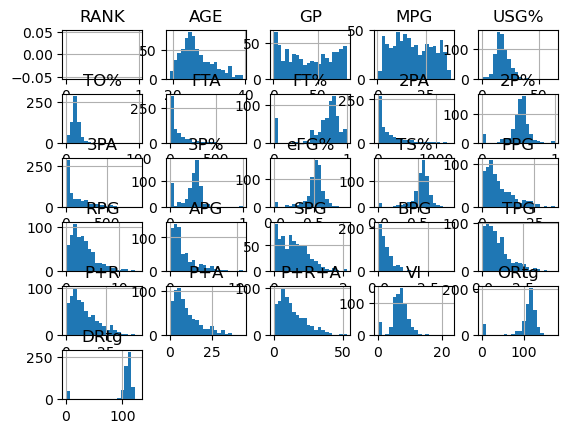

In [19]:
hist = df.hist(bins=20)
hist

In [26]:
df.describe(include=[object])  

,NAME,TEAM,POS
count,657,657,657
unique,573,30,7
top,Shake Milton,Mem,G
freq,3,33,265


In [42]:
pd.set_option('display.max_columns', None)
df_stats = df.describe(include=[np.number])
df_stats

,RANK,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
count,0.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,NaN,26.699087,40.184170,18.321918,17.956925,12.937747,81.321157,0.682224,201.438356,0.509798,131.435312,0.296423,0.508896,0.537212,8.148858,3.277778,1.952816,0.588128,0.388432,0.955556,11.425723,10.100152,13.378539,6.924049,103.984170,102.061948
std,NaN,4.326873,25.899981,9.976985,6.267817,7.211458,112.790568,0.262107,246.585122,0.156946,156.920797,0.156781,0.130997,0.129117,6.679195,2.391052,1.846791,0.405352,0.408171,0.783093,8.479453,8.201648,9.931195,2.714482,33.339375,29.455077
min,NaN,19.300000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,23.600000,16.000000,10.200000,13.700000,9.500000,8.000000,0.643000,23.000000,0.474000,9.000000,0.250000,0.482000,0.511000,3.300000,1.500000,0.700000,0.300000,0.100000,0.400000,5.000000,4.000000,5.900000,5.600000,103.600000,106.100000
50%,NaN,25.800000,39.000000,17.200000,17.000000,12.400000,36.000000,0.759000,105.000000,0.530000,64.000000,0.336000,0.529000,0.564000,6.100000,2.800000,1.300000,0.500000,0.300000,0.700000,9.300000,7.700000,10.800000,7.000000,113.200000,110.100000
75%,NaN,29.400000,65.000000,26.900000,21.400000,15.500000,106.000000,0.833000,279.000000,0.582000,210.000000,0.384000,0.576000,0.603000,11.500000,4.400000,2.600000,0.900000,0.500000,1.300000,16.400000,14.100000,19.100000,8.400000,120.000000,113.500000
max,NaN,39.300000,82.000000,37.800000,64.000000,100.000000,782.000000,1.000000,1246.000000,1.000000,876.000000,1.000000,0.917000,0.917000,34.700000,13.700000,10.900000,2.100000,3.600000,4.400000,45.700000,43.700000,52.900000,22.900000,172.300000,128.900000


Um potenzielle Ausreißer, für die Dateien zu erhalten wurden zwei unterschiedliche Methodiken implementiert, um potenzielle Ausreißer in den Daten zu identifizieren.

1. IQR
    Untergrenze = Q1 - 1.5 * IQR
    Obergrenze = Q3 + 1.5 * IQR 
2. 3*std
    Untergrenze = mean - 3 * std
    Obergrenze = mean + 3 * std

Bewertung der gefundenen Werte: Die 0 Werte für die response Werte (VI, ORtg, DRtg) müssen bereinigt werden, in dem die Datensätze mit 0 Werten entfernt werden. Da diese 0 Werte die Ergebnisse verfälschen können. Bei anderen Werten Beispielsweise USG% ist auffällig, dass es einen Wert gibt der nicht realistisch scheint. Es gibt mehrere potenzielle Aussreißer, die Werte zwischen 33% und 40% haben. Diese Werte sind jedoch realistische Werte für wichtige Spieler eine Teams. Es gibt jedoch einen Spieler der ein USG% von 64% hat. Dieser Spieler hat jedoch nur ein einzige Spiel bestritten, für etwas über 3 Minuten. Deshalb würde ich eine Minimalgrenze von 10 Spielen einführen die ein Spieler bestritten haben muss, um solche Ausreißer zu vermeiden.
Die restlichen Ausreiser Werte sind entweder keine Ausreißer sondern die besten Spieler der NBA oder fälle die durch das Filtern auf eine Mindestanzahl an spielen nicht mehr benötigt werden.

Eine weitere Idee ist es die Messgrößen wie Beispielsweise FTA, 2PA usw. zu normalisieren. In dem man Werte pro gespielter Minute berechnet, und nicht summierte Werte über eine ganze Saision nutzt.

In [55]:
# Outlier Berechnung mit IQR
outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Column: {col}")
    print(f"Q1: {Q1:.2f}, fQ3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers ({len(outliers)}):")
    print(outliers[col])
    print("-" * 40)

Column: RANK
Q1: nan, fQ3: nan, IQR: nan
Lower Bound: nan, Upper Bound: nan
Outliers (1):
Series([], Name: RANK, dtype: float64)
----------------------------------------
Column: AGE
Q1: 23.60, fQ3: 29.40, IQR: 5.80
Lower Bound: 14.90, Upper Bound: 38.10
Outliers (2):
14     39.3
215    38.9
242    38.1
256    38.1
410    38.8
556    38.9
578    38.9
615    38.8
Name: AGE, dtype: float64
----------------------------------------
Column: GP
Q1: 16.00, fQ3: 65.00, IQR: 49.00
Lower Bound: -57.50, Upper Bound: 138.50
Outliers (3):
Series([], Name: GP, dtype: int64)
----------------------------------------
Column: MPG
Q1: 10.20, fQ3: 26.90, IQR: 16.70
Lower Bound: -14.85, Upper Bound: 51.95
Outliers (4):
Series([], Name: MPG, dtype: float64)
----------------------------------------
Column: USG%
Q1: 13.70, fQ3: 21.40, IQR: 7.70
Lower Bound: 2.15, Upper Bound: 32.95
Outliers (5):
0      39.6
1      36.0
2      33.0
22     34.3
352    33.4
447    33.4
456    64.0
558    39.1
619    39.2
643     

In [46]:
# Outlier Berechnung mit std
std_outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std 
    upper_bound = mean + 3 * std

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    std_outliers[col] = outliers

    print(f"Column: {col}")
    print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Outliers ({len(outliers)}):")
    print(outliers.tolist())
    print("-" * 40)

Column: RANK
Mean: nan, Std Dev: nan
Lower Bound: nan, Upper Bound: nan
Outliers (0):
[]
----------------------------------------
Column: AGE
Mean: 26.70, Std Dev: 4.33
Lower Bound: 13.72, Upper Bound: 39.68
Outliers (0):
[]
----------------------------------------
Column: GP
Mean: 40.18, Std Dev: 25.90
Lower Bound: -37.52, Upper Bound: 117.88
Outliers (0):
[]
----------------------------------------
Column: MPG
Mean: 18.32, Std Dev: 9.98
Lower Bound: -11.61, Upper Bound: 48.25
Outliers (0):
[]
----------------------------------------
Column: USG%
Mean: 17.96, Std Dev: 6.27
Lower Bound: -0.85, Upper Bound: 36.76
Outliers (4):
[39.6, 64.0, 39.1, 39.2]
----------------------------------------
Column: TO%
Mean: 12.94, Std Dev: 7.21
Lower Bound: -8.70, Upper Bound: 34.57
Outliers (6):
[40.3, 40.3, 57.1, 100.0, 50.0, 50.0]
----------------------------------------
Column: FTA
Mean: 81.32, Std Dev: 112.79
Lower Bound: -257.05, Upper Bound: 419.69
Outliers (17):
[452, 608, 782, 649, 497, 423, 

In [69]:
# Zwei der auffälligen Datensätze bei der Ausreißer analyse
print(df.iloc[456:457], df.iloc[2:3])

     RANK                NAME TEAM POS   AGE  GP  MPG  USG%  TO%  FTA  FT%  \
456   NaN  Izaiah Brockington  Nor   G  24.8   1  3.4  64.0  0.0    0  0.0   

     2PA  2P%  3PA  3P%  eFG%  TS%  PPG  RPG  APG  SPG  BPG  TPG  P+R  P+A  \
456    4  0.5    1  0.0   0.4  0.4  4.0  2.0  0.0  0.0  0.0  0.0  6.0  4.0   

     P+R+A   VI  ORtg  DRtg  
456    6.0  0.0   0.0   0.0      RANK                   NAME TEAM POS   AGE  GP   MPG  USG%   TO%  FTA  \
2   NaN  Giannis Antetokounmpo  Mil   F  29.4  73  35.2  33.0  15.4  782   

     FT%   2PA    2P%  3PA    3P%   eFG%    TS%   PPG   RPG  APG  SPG  BPG  \
2  0.657  1246  0.644  124  0.274  0.623  0.648  30.4  11.5  6.5  1.2  1.1   

   TPG   P+R   P+A  P+R+A    VI   ORtg   DRtg  
2  3.4  42.0  37.0   48.5  14.9  125.6  106.9  


In [96]:
# 3. Data corrections

df_mingames = df[df["GP"] > 10].copy()
df_mingames = df_mingames.drop("RANK", axis=1)
df_mingames['id'] = range(1, len(df_mingames) + 1)
df_mingames

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg,id
0,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,0.388,0.561,0.644,34.7,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8,1
1,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,0.786,908,0.573,744,0.382,0.573,0.617,33.9,9.2,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9,2
2,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,0.657,1246,0.644,124,0.274,0.623,0.648,30.4,11.5,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9,3
3,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,0.874,1218,0.576,269,0.353,0.567,0.636,30.1,5.5,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7,4
4,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,0.847,1122,0.516,526,0.401,0.543,0.592,28.7,3.6,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,Wendell Moore Jr.,Min,G,22.6,25,3.0,12.9,18.2,0,0.000,12,0.750,6,0.000,0.500,0.500,0.7,0.5,0.2,0.2,0.0,0.2,1.2,1.0,1.4,5.5,0.0,0.0,532
630,Jalen Slawson,Sac,F,24.5,12,3.1,9.2,25.0,0,0.000,4,1.000,2,0.000,0.667,0.667,0.7,0.6,0.2,0.1,0.1,0.2,1.3,0.8,1.4,5.7,0.0,0.0,533
634,Juan Toscano-Anderson,Sac,F,31.0,11,4.8,11.4,14.3,0,0.000,8,0.250,4,0.250,0.292,0.292,0.6,1.3,0.4,0.1,0.1,0.2,1.9,1.0,2.3,5.7,83.3,95.2,534
638,Maxwell Lewis,Lal,F,21.7,34,3.0,13.6,32.0,3,0.667,12,0.250,9,0.111,0.214,0.246,0.3,0.1,0.2,0.1,0.0,0.3,0.4,0.5,0.6,2.4,0.0,0.0,535


In [104]:
# 4. Variable lists
predictorlist = ["TEAM", "POS", "AGE", "GP", "MPG", "USG%", "TO%", "FTA", "FT%", "2PA", "2P%", "3PA", "3P%", "eFG%", "TS%", "PPG", "RPG", "APG", "SPG", "BPG", "TPG", "P+R", "P+A", "P+R+A"]
predictorListCon = ["AGE", "GP", "MPG", "USG%", "TO%", "FTA", "FT%", "2PA", "2P%", "3PA", "3P%", "eFG%", "TS%", "PPG", "RPG", "APG", "SPG", "BPG", "TPG", "P+R", "P+A", "P+R+A"]
predictorListCat = ["TEAM", "POS"]
responselist = ["VI", "ORtg", "DRtg"]

In [131]:
# 5. Data splitting
X = df_mingames.drop(columns=predictorlist)
y = df_mingames[responselist]

In [133]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [135]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (375, 5), (375, 3)
Validation set: (80, 5), (80, 3)
Test set: (81, 5), (81, 3)
